## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns='EIN')
application_df = application_df.drop(columns='NAME')

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T25','T14','T29','T15','T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
filtered_df = application_df[application_df['CLASSIFICATION'] > '1']

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
G1_df = filtered_df['CLASSIFICATION'].value_counts()
print(G1_df)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 50
classifications_to_replace = list(G1_df[G1_df<cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
df_application = pd.get_dummies(application_df,dtype=float)
df_application.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Split our preprocessed data into our features and target arrays
y = df_application['IS_SUCCESSFUL']
X = df_application.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

### Attempt 1

In [15]:
input_dim=X_train.shape[1]
print(input_dim)

43


In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(input_dim=X_train.shape[1], units=22, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=11, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                968       
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 1233 (4.82 KB)
Trainable params: 1233 (4.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


804/804 [==============================] - 1s 741us/step - loss: 0.5860 - accuracy: 0.7159
Epoch 2/100
804/804 [==============================] - 1s 697us/step - loss: 0.5579 - accuracy: 0.7290
Epoch 3/100
804/804 [==============================] - 1s 700us/step - loss: 0.5542 - accuracy: 0.7314
Epoch 4/100
804/804 [==============================] - 1s 705us/step - loss: 0.5525 - accuracy: 0.7321
Epoch 5/100
804/804 [==============================] - 1s 722us/step - loss: 0.5510 - accuracy: 0.7316
Epoch 6/100
804/804 [==============================] - 1s 692us/step - loss: 0.5499 - accuracy: 0.7326
Epoch 7/100
804/804 [==============================] - 1s 704us/step - loss: 0.5497 - accuracy: 0.7316
Epoch 8/100
804/804 [==============================] - 1s 739us/step - loss: 0.5483 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 1s 712us/step - loss: 0.5479 - accuracy: 0.7342
Epoch 10/100
804/804 [==============================] - 1s 734us/step -

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5529 - accuracy: 0.7245 - 250ms/epoch - 933us/step
Loss: 0.5529493093490601, Accuracy: 0.7245481014251709


### Attempt 2

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(input_dim=43, units=64, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model2 = nn2.fit(X_train_scaled, y_train, epochs=100)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2816      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/100


804/804 [==============================] - 1s 759us/step - loss: 0.5758 - accuracy: 0.7180
Epoch 2/100
804/804 [==============================] - 1s 722us/step - loss: 0.5562 - accuracy: 0.7305
Epoch 3/100
804/804 [==============================] - 1s 747us/step - loss:

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5581 - accuracy: 0.7256 - 251ms/epoch - 937us/step
Loss: 0.558115541934967, Accuracy: 0.7255976796150208


### Attempt 3

In [13]:
input_dim=X_train.shape[1]
print(input_dim)

47


In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(input_dim=47, units=923, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=71, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model3 = nn3.fit(X_train_scaled, y_train, epochs=100)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 923)               44304     
                                                                 
 dense_1 (Dense)             (None, 71)                65604     
                                                                 
 dense_2 (Dense)             (None, 1)                 72        
                                                                 
Total params: 109980 (429.61 KB)
Trainable params: 109980 (429.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/100


804/804 [==============================] - 1s 1ms/step - loss: 0.5686 - accuracy: 0.7266
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7315
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss:

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5644 - accuracy: 0.7264 - 194ms/epoch - 726us/step
Loss: 0.5644324421882629, Accuracy: 0.7264139652252197


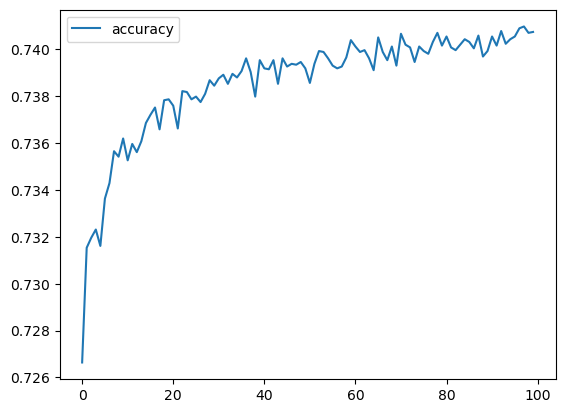

In [18]:
import matplotlib.pyplot as plt

history = pd.DataFrame(fit_model3.history)

# Plot the accuracy & save as png
history.plot(y="accuracy")
plt.savefig('Images/fit_model3.png')
plt.show()

In [19]:
# Export our model to HDF5 file
# # First Attempt
# nn.save("/models/AlphabetSoupCharity_Optimization.h5")

# # Second Attempt
# nn2.save("/models/AlphabetSoupCharity_Optimization2.h5")

# Third Attempt
nn3.save("/models/AlphabetSoupCharity_Optimization3.h5")

c:\Users\elise\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Attempt 4

In [13]:
input_dim=X_train.shape[1]
print(input_dim)

57


In [14]:
nn4 = tf.keras.models.Sequential()

# Layers + Dropout Layers
nn4.add(tf.keras.layers.Dense(input_dim=57, units=10, activation="relu"))
nn4.add(tf.keras.layers.Dense(units=5, activation="relu"))
nn4.add(tf.keras.layers.Dense(units=3, activation="relu"))
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile and train the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model4 = nn4.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100


804/804 [==============================] - 1s 736us/step - loss: 0.6959 - accuracy: 0.6739
Epoch 2/100
804/804 [==============================] - 1s 720us/step - loss: 0.5928 - accuracy: 0.7138
Epoch 3/100
804/804 [==============================] - 1s 714us/step - loss: 0.5741 - accuracy: 0.7231
Epoch 4/100
804/804 [==============================] - 1s 726us/step - loss: 0.5686 - accuracy: 0.7245
Epoch 5/100
804/804 [==============================] - 1s 715us/step - loss: 0.5660 - accuracy: 0.7260
Epoch 6/100
804/804 [==============================] - 1s 750us/step - loss: 0.5643 - accuracy: 0.7264
Epoch 7/100
804/804 [==============================] - 1s 714us/step - loss: 0.5624 - accuracy: 0.7280
Epoch 8/100
804/804 [==============================] - 1s 718us/step - loss: 0.5563 - accuracy: 0.7289
Epoch 9/100
804/804 [==============================] - 1s 718us/step - loss: 0.5533 - accuracy: 0.7315
Epoch 10/100
804/804 [==============================] - 1s 721us/step

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5546 - accuracy: 0.7271 - 249ms/epoch - 929us/step
Loss: 0.5546377301216125, Accuracy: 0.7271137237548828


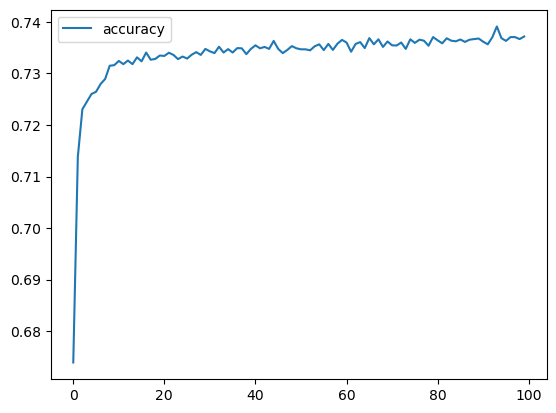

In [16]:
history = pd.DataFrame(fit_model4.history)

# Plot the accuracy & save as png
history.plot(y="accuracy")
plt.savefig('Images/fit_model4.png')
plt.show()